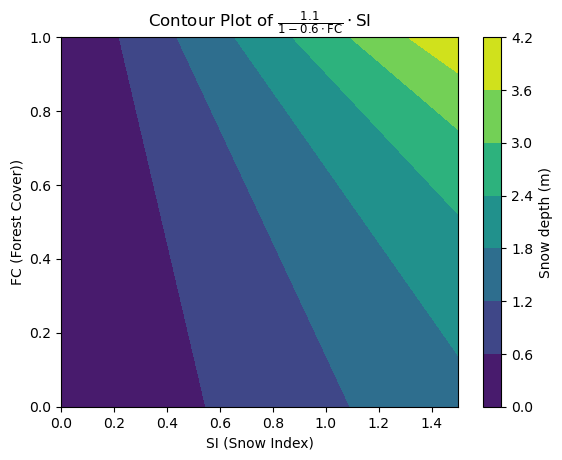

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_formula(SI, FC):
    result = (1.1 / (1 - 0.6 * FC)) * SI
    return result

# Define the range of values for SI and FC
SI_values = np.linspace(0, 1.5, 100)  # Range from -5 to 5 with 100 points
FC_values = np.linspace(0, 1, 100)  # Range from -5 to 5 with 100 points

# Create a grid of SI and FC values
SI_grid, FC_grid = np.meshgrid(SI_values, FC_values)

# Calculate the formula for each combination of SI and FC
result = (1.1 / (1 - 0.6 * FC_grid)) * SI_grid

num_levels = 6  # You can adjust this value as needed

# Create a contour plot with a specified number of levels
contour = plt.contourf(SI_grid, FC_grid, result, cmap='viridis', levels=num_levels)
# plt.colorbar(contour, label='Result')!
plt.colorbar(label='Snow depth (m)')
plt.xlabel('SI (Snow Index)')
plt.ylabel('FC (Forest Cover))')
plt.title(r'Contour Plot of $\frac{1.1}{1 - 0.6 \cdot \mathrm{FC}} \cdot \mathrm{SI}$')
plt.show()


In [5]:
# import requests
# from bs4 import BeautifulSoup
# archive_url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/geotiff/1978/10_Oct/"
# r = requests.get(archive_url)
# data = BeautifulSoup(r.text, "html.parser")
# for l in data.find_all("a")[1:]:	
#     r = requests.get(archive_url + l["href"])	
#     with open(l["href"], "wb") as f:    	         
#         f.write(r.content)
import os
import requests
from bs4 import BeautifulSoup

archive_url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/geotiff/1978/10_Oct/"
r = requests.get(archive_url)
data = BeautifulSoup(r.text, "html.parser")

# Create the folder if it doesn't exist
folder_name = "IMS_snowcovermap"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for l in data.find_all("a")[1:]:
    image_url = archive_url + l["href"]
    response = requests.get(image_url)
    
    # Combine the folder name with the file name
    file_path = os.path.join(folder_name, l["href"])

    with open(file_path, "wb") as f:
        f.write(response.content)

    print(f"Image saved: {file_path}")


KeyboardInterrupt: 

## EXcel stuff for lulc

In [8]:
path = r"C:\Users\trygg\Documents\Master_project\Data\GIS_data\Sweden_physical_data\Vasterbotten\Merged_shapefiles_study_area\points_with_lulc.xls"

# import as pandas dataframe excel
import pandas as pd

df = pd.read_excel(path)
df.head()
# columns to keep
columns_to_keep = ["TriangleCo", 
                   'ID',
                   'date',
                   'CODE_18'
                   ]
df = df[columns_to_keep]
df.head()

,TriangleCo,ID,date,CODE_18
0,AC-42A,0,2017-02-21,322
1,AC-38A,1,2017-02-26,322
2,AC-37A,2,2017-02-26,322
3,AC-31A,3,2017-02-26,322
4,AC-39A,4,2017-03-04,322


In [15]:
df['TriangleCo'].unique()

#create a new df with only the unique values for TriangleCo
df_unique = df.drop_duplicates(subset=['TriangleCo'])
#reset index
df_unique = df_unique.reset_index(drop=True)
df_unique

,TriangleCo,ID,date,CODE_18
0,AC-42A,0,2017-02-21,322
1,AC-38A,1,2017-02-26,322
2,AC-37A,2,2017-02-26,322
3,AC-31A,3,2017-02-26,322
4,AC-39A,4,2017-03-04,322
...,...,...,...,...
67,AC-21C,305,2017-03-17,322
68,AC-23C,306,2017-04-18,322
69,AC-28C,307,2017-04-14,333
70,AC-43C,310,2017-04-18,321


In [17]:
#export df_unique to csv
path = r'C:\Users\trygg\Documents\Master_project\Data\GIS_data\Sweden_physical_data\Vasterbotten\Merged_shapefiles_study_area\points_with_lulc_unique.csv'
df_unique.to_csv(path, index=False)

In [16]:
len(df['TriangleCo'].unique()
)

72

In [14]:
print(df_unique.to_markdown())

|     | TriangleCo   |   ID | date                |   CODE_18 |
|----:|:-------------|-----:|:--------------------|----------:|
|   0 | AC-42A       |    0 | 2017-02-21 00:00:00 |       322 |
|   1 | AC-38A       |    1 | 2017-02-26 00:00:00 |       322 |
|   2 | AC-37A       |    2 | 2017-02-26 00:00:00 |       322 |
|   3 | AC-31A       |    3 | 2017-02-26 00:00:00 |       322 |
|   4 | AC-39A       |    4 | 2017-03-04 00:00:00 |       322 |
|   5 | AC-40A       |    5 | 2017-03-04 00:00:00 |       322 |
|   6 | AC-41A       |    6 | 2017-03-04 00:00:00 |       322 |
|   7 | AC-33A       |    7 | 2017-03-04 00:00:00 |       322 |
|   8 | AC-32A       |    8 | 2017-03-05 00:00:00 |       333 |
|   9 | AC-27A       |    9 | 2017-03-05 00:00:00 |       321 |
|  10 | AC-30A       |   10 | 2017-03-06 00:00:00 |       333 |
|  11 | AC-34A       |   11 | 2017-03-06 00:00:00 |       322 |
|  12 | AC-35A       |   12 | 2017-03-06 00:00:00 |       322 |
|  13 | AC-36A       |   13 | 2017-03-17

In [3]:
%pip install xlrd


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 325.1 kB/s eta 0:00:01
   ----------------------------- ---------- 71.7/96.5 kB 558.5 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
